In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df1 = pd.read_csv('df_final_demo.txt')

In [15]:
df2 = pd.read_csv('df_final_experiment_clients.txt')

In [16]:
df3= pd.read_csv('df_final_web_data.csv')

In [4]:
df1.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [5]:
df1.nunique()

client_id           70609
clnt_tenure_yr         54
clnt_tenure_mnth      482
clnt_age              165
gendr                   4
num_accts               8
bal                 70328
calls_6_mnth            8
logons_6_mnth           9
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [7]:
df1['gendr'].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [8]:
#ahora vamos a dividr el df en valores categóricos y numéricos
df1_cat = df1.select_dtypes(include=['object'])
df1_num = df1.select_dtypes(include=['float64', 'int64'])


In [9]:
df1_cat.head()

,gendr
0,U
1,U
2,U
3,M
4,F


In [11]:
df1_cat.nunique()

gendr    4
dtype: int64

In [12]:
df1_num.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,2.0,103671.75,0.0,3.0


In [14]:
df1_num.nunique()

client_id           70609
clnt_tenure_yr         54
clnt_tenure_mnth      482
clnt_age              165
num_accts               8
bal                 70328
calls_6_mnth            8
logons_6_mnth           9
dtype: int64

In [24]:
df1_num.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,2.0,103671.75,0.0,3.0


In [17]:
df2.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [18]:
df2.nunique()

client_id    70609
Variation        2
dtype: int64

In [19]:
df2.shape

(70609, 2)

In [28]:
# Ahora haremos un merge de los dos dataframes
df = pd.merge(df1, df2, on='client_id', how='inner')

In [29]:
df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


In [64]:
#guardamos el nuevo df como un csv
df.to_csv('df_final.csv', index=False)

In [31]:
df3.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


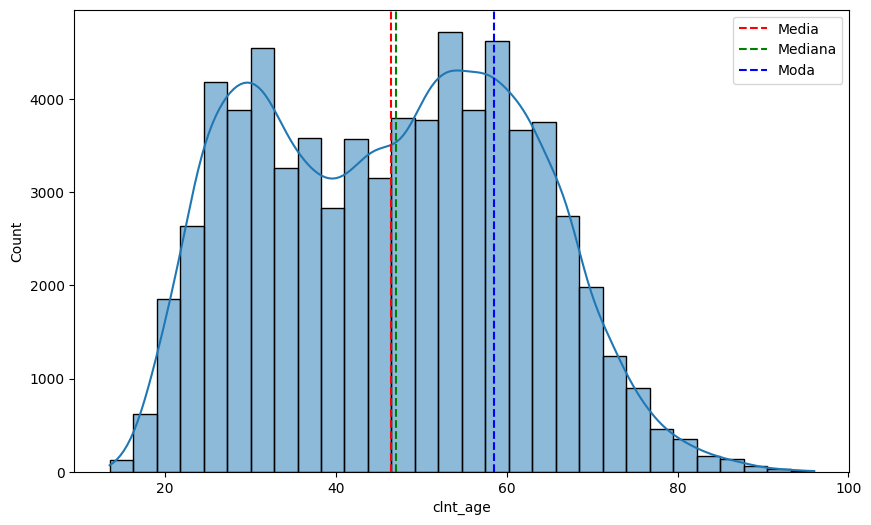

In [41]:
# Para tomar primeras decisiones, vamos a centrarnos en sacar un analisis demografico en torno a los clientes.
# Para ello, vamos a hacer un análisis de la variable 'gendr' y 'clnt_age
# hacemos un histograma para ver las edades de los clientes, que nos marque la media, la mediana y la moda. y nos señales los outlaigers
plt.figure(figsize=(10,6))
sns.histplot(df1['clnt_age'], bins=30, kde=True)
plt.axvline(df1['clnt_age'].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df1['clnt_age'].median(), color='g', linestyle='--', label='Mediana')
plt.axvline(df1['clnt_age'].mode()[0], color='b', linestyle='--', label='Moda')
plt.legend()
plt.show()



In [42]:
# rango de edad de los clientes
print(f"La edad mínima de los clientes es: {df['clnt_age'].min()}")
print(f"La edad máxima de los clientes es: {df['clnt_age'].max()}")

La edad mínima de los clientes es: 13.5
La edad máxima de los clientes es: 96.0


In [46]:
#muestrame la edad de los clientes agrupadas por de 0 a 17 menor de edad, de 18 a 35 joven, de 36 a 55 adulto, de 56 a 70 senior y de 71 en adelante anciano
bins = [0, 17, 35, 55, 70, 120]
labels = ['Menor de edad', 'Joven', 'Adulto', 'Senior', 'Anciano']
df['clnt_age_group'] = pd.cut(df['clnt_age'], bins=bins, labels=labels)


In [47]:
df['clnt_age_group']

0        Senior
1        Senior
2         Joven
3        Adulto
4         Joven
          ...  
70604    Adulto
70605     Joven
70606    Senior
70607    Senior
70608    Senior
Name: clnt_age_group, Length: 70609, dtype: category
Categories (5, object): ['Menor de edad' < 'Joven' < 'Adulto' < 'Senior' < 'Anciano']

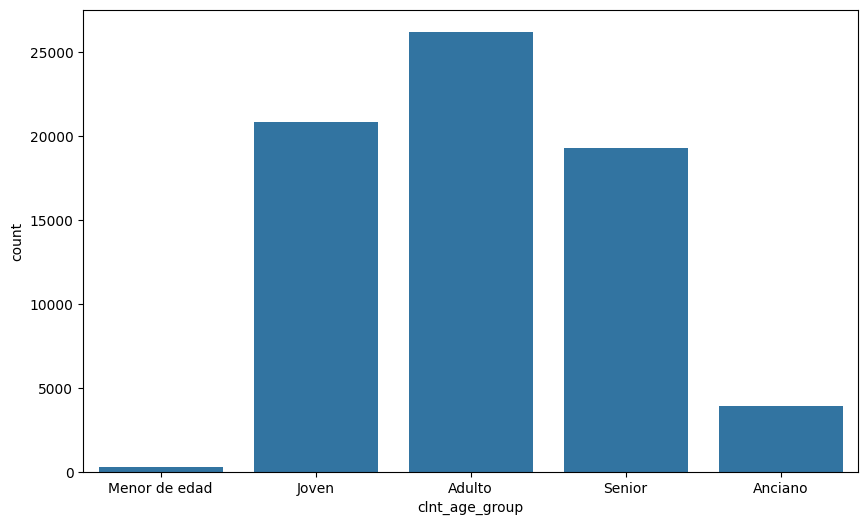

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='clnt_age_group', data=df)
plt.show()

In [ ]:
df['clnt_age_group'].value_counts()


clnt_age_group
Adulto           26235
Joven            20864
Senior           19314
Anciano           3930
Menor de edad      251
Name: count, dtype: int64

In [50]:
df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,Senior
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,Senior
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,Joven
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,Adulto
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,Joven


In [53]:
df['gendr']

0        U
1        U
2        U
3        M
4        F
        ..
70604    U
70605    M
70606    F
70607    M
70608    F
Name: gendr, Length: 70609, dtype: object

In [57]:
df = df[df['gendr'] != 'X']

In [58]:
df['gendr']


0        U
1        U
2        U
3        M
4        F
        ..
70604    U
70605    M
70606    F
70607    M
70608    F
Name: gendr, Length: 70606, dtype: object

In [61]:
df3.head(20)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43


In [60]:
df3.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [62]:
df.shape

(70606, 11)

In [63]:
df3.shape

(755405, 5)